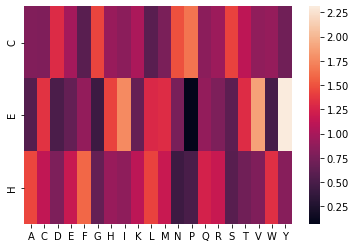

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('./out/1.out', sep=' ')
a = df.groupby(['res', 'struc'])['I'].count().reset_index(name='N')

ress = a['res'].unique()
strucs = a['struc'].unique()

N = len(df)
n_i = {i : a[a['res'] == i]['N'].sum() for i in ress}
N_k = {k : a[a['struc'] == k]['N'].sum() for k in strucs}
n_ik = {(i,k) : a[(a['res'] == i) & (a['struc'] == k)]['N'] for i,k in zip(a['res'], a['struc'])}

table = pd.DataFrame(0.0, columns=ress, index=strucs)
for i,k in zip(a['res'], a['struc']):
    table[i][k] += (n_ik[(i,k)] / n_i[i]) / (N_k[k] / N)
sns.heatmap(table).figure.savefig('a.png')

In [3]:
table.style.format("{:.2f}")